# image classfication of cats or dog  with support vector machine SVM 

# importing the packages :

In [48]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




# prepare the dataset

define the dataset source and categories:

In [49]:
input_dir = r'C:\Users\Abdallah\Documents\Task3\Data'
categories = ['cats', 'dogs']

prepare the dataset by getting the images matrices according to thier paths in directory then resize them from 255-255 to 25-25 then transform them 1-dimension array and add them to data list ,for labels they are 0 or 1 (0 for cat and 1 for dog) :

In [50]:
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (25, 25))
        data.append(img.flatten())
        labels.append(category_idx)

transform them to np array

In [51]:
data = np.asarray(data)
labels = np.asarray(labels)
print("data",data)
print("labels",labels)


data [[0.83346952 0.61617526 0.54587485 ... 0.14980032 0.12963289 0.11997903]
 [0.15191401 0.08951987 0.09157514 ... 0.44622311 0.44033342 0.42810827]
 [0.28667336 0.23943356 0.14641222 ... 0.22725295 0.21384089 0.16705777]
 ...
 [0.64574496 0.63003151 0.59463696 ... 0.80201169 0.83625344 0.90356196]
 [0.57850442 0.59418297 0.59661722 ... 0.46711367 0.4646019  0.44741974]
 [0.96447983 0.95466899 0.94398699 ... 0.98536403 0.98127123 0.96288066]]
labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## now let's split the dataset to train set and test set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## now we prepare the dataset to give it to our SVC model

let's start

let's try to give many values to the kernel fonction of SVC model for gamma is used for the problem of overfitting and lowfitting and C for the problem of regulization 

In [53]:
parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

In [54]:
grid_search = GridSearchCV(classifier, parameters)

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

here we try to chose the best paramters gamma and C that reduces the mentionned problems 

In [56]:
best_estimator = grid_search.best_estimator_


let's predict the labels here of our model if is cat 0 or dog 1

In [57]:
y_prediction = best_estimator.predict(X_test)

let's see how our model is good in predictions

In [58]:
score = accuracy_score(y_prediction, y_test)

print('{}% of samples were correctly classified'.format(str(score * 100)))

54.761904761904766% of samples were correctly classified


# visualizing the results 

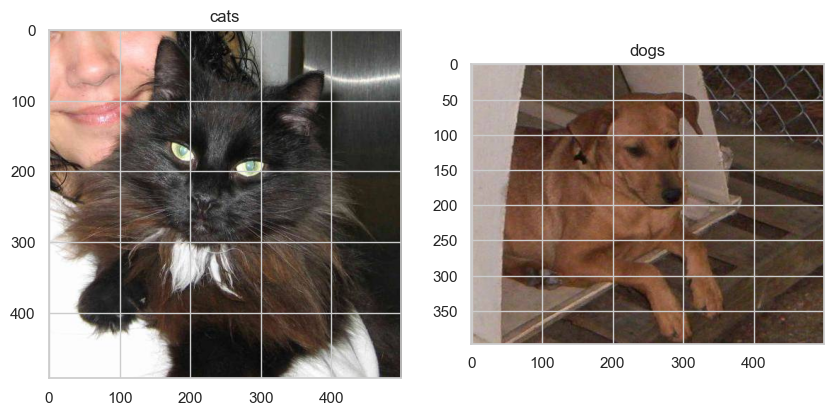

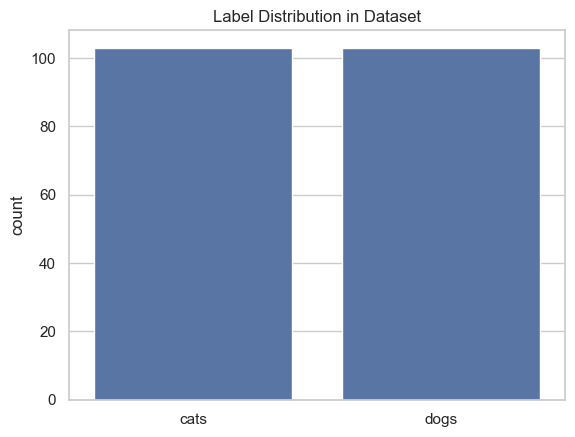

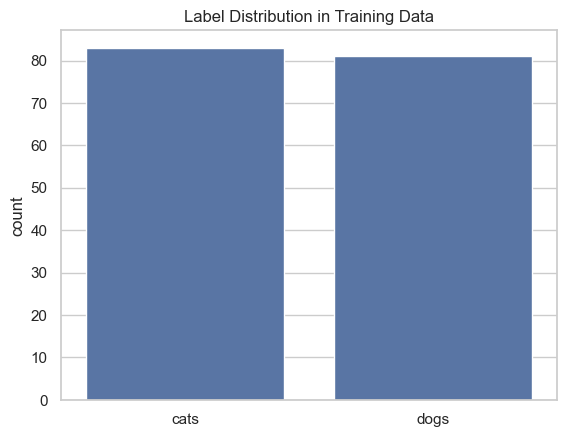

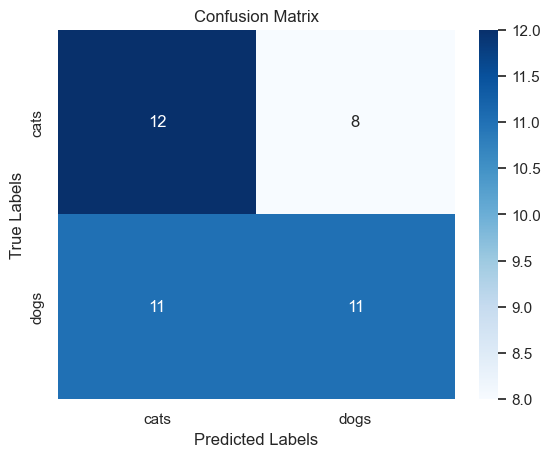

In [59]:
fig, axes = plt.subplots(1, len(categories), figsize=(10, 5))
for ax, category, idx in zip(axes, categories, range(len(categories))):
    sample_image_path = os.listdir(os.path.join(input_dir, category))[0]
    sample_image = imread(os.path.join(input_dir, category, sample_image_path))
    ax.imshow(sample_image)
    ax.set_title(category)
plt.show()

sns.countplot(x=labels)
plt.title('Label Distribution in Dataset')
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

sns.countplot(x=y_train)
plt.title('Label Distribution in Training Data')
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

cm = confusion_matrix(y_test, y_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()